# 本章节学习 初始化参数的不同影响

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [2]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

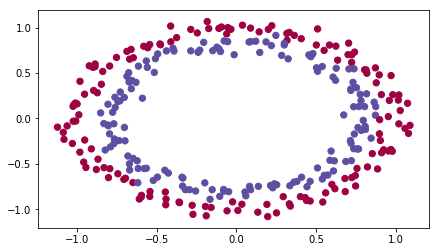

In [3]:
#引入数据
train_X, train_Y, test_X, test_Y = load_dataset()

In [5]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s


def relu(x):
    s = np.maximum(0,x)
    return s


def compute_loss(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    return loss

def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)

    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    return a3, cache


def backward_propagation(X, Y, cache):
    
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache

    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)

    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)

    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)

    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    return gradients


def update_parameters(parameters, grads, learning_rate):
   
    L = len(parameters) // 2 
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
    return parameters


def predict(X, y, parameters):
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    a3, caches = forward_propagation(X, parameters)

    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    return p





def plot_decision_boundary(model, X, y):
    
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
   
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)
    plt.show()


def predict_dec(parameters, X):
    
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions


In [9]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    #这里定义的x横向是特征数 纵向是样本数  希望你能清晰理解这个矩阵的维度
    grads = {}
    costs = [] 
    m = X.shape[1] 
    layers_dims = [X.shape[0], 10, 5, 1]
    
    
    if initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(0, num_iterations):

        #前向传播
        a3, cache = forward_propagation(X, parameters)

        #误差
        cost = compute_loss(a3, Y)

        #反向传播
        grads = backward_propagation(X, Y, cache)

        # 更新参数
        parameters = update_parameters(parameters, grads, learning_rate)

        # 打印
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    # 绘制成本曲线
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


In [18]:
#随机初始化
def initialize_parameters_random(layers_dims):
    np.random.seed(3)            
    parameters = {}
    L = len(layers_dims)       
    for l in range(1, L):
        #使用大的初始化值会使梯度下降变慢
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters


/Users/qiyong/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/qiyong/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


Cost after iteration 0: inf
Cost after iteration 1000: 0.6250884962121392
Cost after iteration 2000: 0.5981371467489438
Cost after iteration 3000: 0.5638539771863162
Cost after iteration 4000: 0.5501704762630747
Cost after iteration 5000: 0.5444592806792145
Cost after iteration 6000: 0.5374509252365552
Cost after iteration 7000: 0.4760640415643904
Cost after iteration 8000: 0.3978146724300182
Cost after iteration 9000: 0.3934785833165248
Cost after iteration 10000: 0.3920322287285902
Cost after iteration 11000: 0.38924754816043866
Cost after iteration 12000: 0.38615976417756703
Cost after iteration 13000: 0.38498687252939306
Cost after iteration 14000: 0.38278602219555746


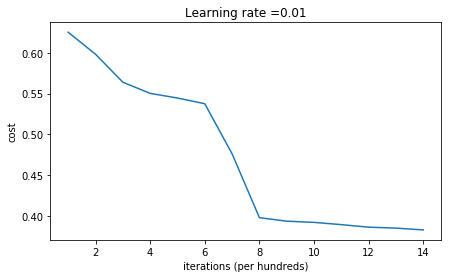

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [19]:
#用随机初始化训练模型
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


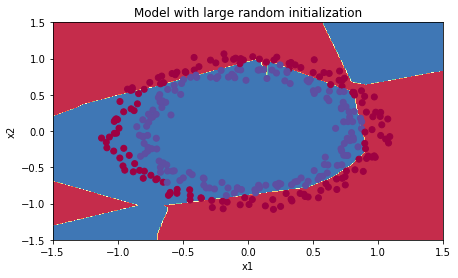

In [20]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


In [21]:
#he 随机初始化 
def initialize_parameters_he(layers_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 

    for l in range(1, L + 1):
       
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
    return parameters


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071795
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.2369621533032257
Cost after iteration 9000: 0.18597287209206845
Cost after iteration 10000: 0.1501555628037181
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024273
Cost after iteration 14000: 0.07357895962677366


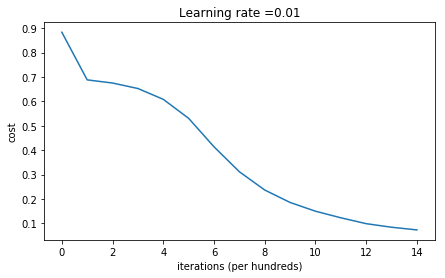

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [22]:
#用he随机初始化训练模型
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


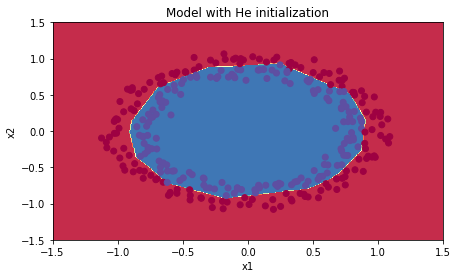

In [23]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
